In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("paris_data.csv",sep=";")

Was beschreiben die Daten?



Die Daten beschreiben Wohnungsangebote mit verschiedenen Attributen wie Anzahl der Zimmer, Wohnfläche, Etage, Mietpreis und weiteren Ausstattungsmerkmalen.

Warum sind die Daten relevant oder interessant?

Diese Daten sind relevant, um Einblicke in den Wohnungsmarkt zu erhalten und um zu verstehen, welche Faktoren den Mietpreis beeinflussen.

Welche Daten sind enthalten? 

In [3]:
print("Die Daten enthalten folgende Spalten :")
for i,feature in enumerate(dataset.columns):
    print(i," - ", feature)

Die Daten enthalten folgende Spalten :
0  -  url
1  -  title
2  -  rooms
3  -  area
4  -  floor
5  -  rent
6  -  location
7  -  double_glazing
8  -  iron
9  -  freezer
10  -  linen
11  -  tv
12  -  washing_machine
13  -  internet_included
14  -  air_conditioning
15  -  telephone_line
16  -  cable
17  -  satellite
18  -  dryer
19  -  dishwasher
20  -  terrace
21  -  toaster
22  -  coffee_maker
23  -  digicode
24  -  no_smoking
25  -  elevator
26  -  pets_accepted
27  -  swimming_pool
28  -  weekly_housekeeping
29  -  garage
30  -  intercom
31  -  concierge
32  -  basement
33  -  perfect_for_sharing
34  -  bike_storage
35  -  parking_lot_optional


Wie sind die Daten formatiert?

Die Daten sind in tabellarischer Form mit verschiedenen Datentypen 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891 entries, 0 to 4890
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   4891 non-null   object 
 1   title                 4891 non-null   object 
 2   rooms                 4891 non-null   int64  
 3   area                  4891 non-null   float64
 4   floor                 4891 non-null   int64  
 5   rent                  4891 non-null   float64
 6   location              4891 non-null   object 
 7   double_glazing        4891 non-null   int64  
 8   iron                  4891 non-null   int64  
 9   freezer               4891 non-null   int64  
 10  linen                 4891 non-null   int64  
 11  tv                    4891 non-null   int64  
 12  washing_machine       4891 non-null   int64  
 13  internet_included     4891 non-null   int64  
 14  air_conditioning      4891 non-null   int64  
 15  telephone_line       

 Welche Schritte haben Sie unternommen, um die Daten zu bereinigen?

-  Gibt es Ausreißer, Duplikate oder fehlende Werte?
    -    Da es keine fehlenden Werte gibt, müssen wir hier nichts weiter tun.
    -    keine Duplikate
    -    Außreiser existieren und wir haben diese gelöscht.

In [5]:
print("Anzahl der Duplikate:", dataset.duplicated().sum())

Anzahl der Duplikate: 0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

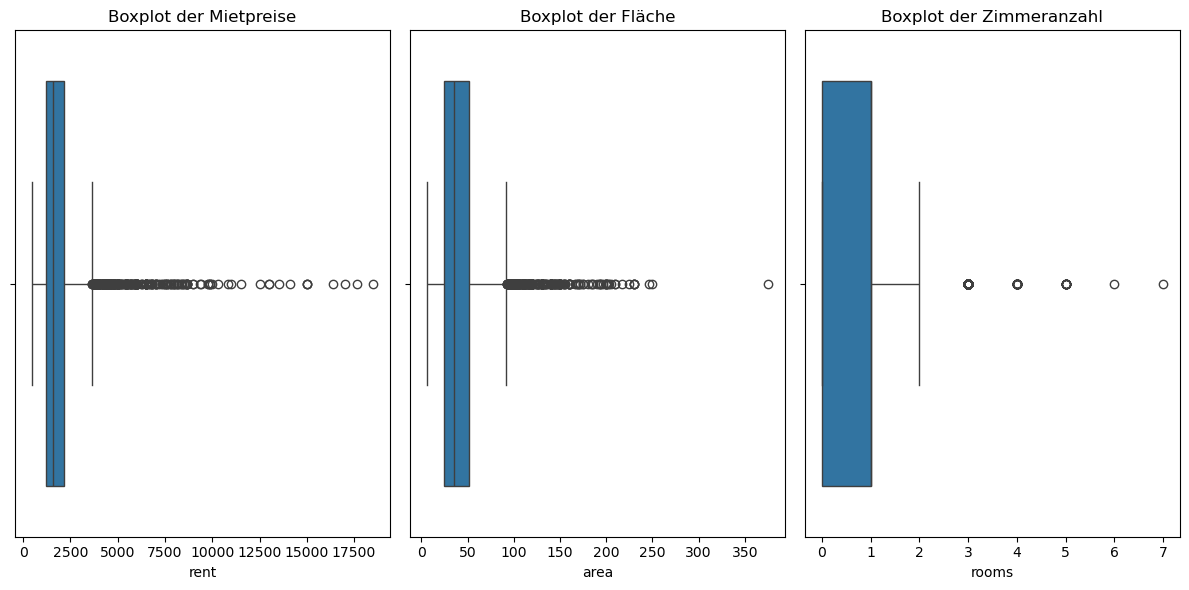

In [7]:
# Boxplot für Mietpreise, Fläche und Zimmeranzahl
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x=dataset['rent'])
plt.title('Boxplot der Mietpreise')

plt.subplot(1, 3, 2)
sns.boxplot(x=dataset['area'])
plt.title('Boxplot der Fläche')

plt.subplot(1, 3, 3)
sns.boxplot(x=dataset['rooms'])
plt.title('Boxplot der Zimmeranzahl')

plt.tight_layout()
plt.show()

In [8]:
# Entfernen von Ausreißern (3 Standardabweichungen Regel)
mean_rent = dataset['rent'].mean()
std_rent = dataset['rent'].std()
dataset = dataset[(dataset['rent'] >= mean_rent - 3 * std_rent) & (dataset['rent'] <= mean_rent + 3 * std_rent)]

In [9]:
mean_area = dataset['area'].mean()
std_area = dataset['area'].std()
dataset = dataset[(dataset['area'] >= mean_area - 3 * std_area) & (dataset['area'] <= mean_area + 3 * std_area)]

In [10]:
mean_rooms = dataset['rooms'].mean()
std_rooms = dataset['rooms'].std()
dataset = dataset[(dataset['area'] >= mean_area - 3 * std_area) & (dataset['area'] <= mean_area + 3 * std_area)]

In [11]:
dataset.describe()

,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Gibt es Fehler im Datensatz?
- Sind die Daten konsistent?

In [12]:
# Überprüfen, ob die Anzahl der Zimmer 
dataset = dataset[dataset['rooms'] >= 0]


In [13]:
dataset.describe()

,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Überprüfen, ob die Wohnfläche und der Mietpreis positive Werte sind
dataset = dataset[dataset['area'] > 0]
dataset.describe()

,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
dataset = dataset[dataset['rent'] > 0]
dataset.describe()

,rooms,area,floor,rent,double_glazing,iron,freezer,linen,tv,washing_machine,...,pets_accepted,swimming_pool,weekly_housekeeping,garage,intercom,concierge,basement,perfect_for_sharing,bike_storage,parking_lot_optional
count,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,...,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,3.109930,1739.361259,0.622794,0.763768,0.483096,0.310440,0.834574,0.854774,...,0.055922,0.000213,0.018074,0.019987,0.314693,0.264725,0.034021,0.039762,0.097172,0.052094
std,0.798815,20.492054,2.743391,792.812703,0.484739,0.424812,0.499767,0.462723,0.371604,0.352366,...,0.229795,0.014582,0.133232,0.139971,0.464443,0.441233,0.181302,0.195420,0.296223,0.222241
min,0.000000,6.000000,0.000000,460.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,1.000000,1200.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.000000,3.000000,1520.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,50.000000,5.000000,2050.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,114.000000,44.000000,5900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
bool_columns = ['double_glazing', 'iron', 'freezer', 'linen', 'tv', 'washing_machine',
                'internet_included', 'air_conditioning', 'telephone_line', 'cable',
                'satellite', 'dryer', 'dishwasher', 'terrace', 'toaster', 'coffee_maker',
                'digicode', 'no_smoking', 'elevator', 'pets_accepted', 'swimming_pool',
                'weekly_housekeeping', 'garage', 'intercom', 'concierge', 'basement',
                'perfect_for_sharing', 'bike_storage', 'parking_lot_optional']

In [17]:
for col in bool_columns:
    dataset = dataset[dataset[col].isin([0, 1])]
dataset.describe()
# Umwandlung der booleschen Merkmale von int64 in bool
for col in bool_columns:
    dataset[col] = dataset[col].astype(bool)

In [18]:
print("Nach der Umwandlung:")
print(dataset.dtypes)

Nach der Umwandlung:
url                      object
title                    object
rooms                     int64
area                    float64
floor                     int64
rent                    float64
location                 object
double_glazing             bool
iron                       bool
freezer                    bool
linen                      bool
tv                         bool
washing_machine            bool
internet_included          bool
air_conditioning           bool
telephone_line             bool
cable                      bool
satellite                  bool
dryer                      bool
dishwasher                 bool
terrace                    bool
toaster                    bool
coffee_maker               bool
digicode                   bool
no_smoking                 bool
elevator                   bool
pets_accepted              bool
swimming_pool              bool
weekly_housekeeping        bool
garage                     bool
intercom           

In [19]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4703 entries, 0 to 4890
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   4703 non-null   object 
 1   title                 4703 non-null   object 
 2   rooms                 4703 non-null   int64  
 3   area                  4703 non-null   float64
 4   floor                 4703 non-null   int64  
 5   rent                  4703 non-null   float64
 6   location              4703 non-null   object 
 7   double_glazing        4703 non-null   bool   
 8   iron                  4703 non-null   bool   
 9   freezer               4703 non-null   bool   
 10  linen                 4703 non-null   bool   
 11  tv                    4703 non-null   bool   
 12  washing_machine       4703 non-null   bool   
 13  internet_included     4703 non-null   bool   
 14  air_conditioning      4703 non-null   bool   
 15  telephone_line        4703

In [20]:
print('unique location number :',len(dataset['location'].unique()))
for idx,loc in enumerate(dataset['location'].unique()):
    print(idx,'-',loc)

unique location number : 27
0 - Paris 3°
1 - Paris 4°
2 - Val D'Oise
3 - Hauts-de-Seine
4 - Paris 15°
5 - Paris 20°
6 - Paris 7°
7 - Paris 18°
8 - Paris 10°
9 - Paris 14°
10 - Paris 5°
11 - Paris 9°
12 - Paris 16°
13 - Paris 13°
14 - Paris 2°
15 - Val de Marne
16 - Paris 8°
17 - Paris 6°
18 - Paris 1°
19 - Paris 17°
20 - Paris 11°
21 - Yvelines
22 - Paris 19°
23 - Seine St-Denis
24 - Paris 12°
25 - Seine Et Marne
26 - Essonne


In [21]:
dataset_one_hot = pd.get_dummies(dataset, columns=['location'])

In [22]:
dataset_one_hot

,url,title,rooms,area,floor,rent,double_glazing,iron,freezer,linen,...,location_Paris 5°,location_Paris 6°,location_Paris 7°,location_Paris 8°,location_Paris 9°,location_Seine Et Marne,location_Seine St-Denis,location_Val D'Oise,location_Val de Marne,location_Yvelines
0,"https://www.lodgis.com/en/paris,long-term-rent...",2 bedroom furnished apartment with elevatorLe ...,2,88.0,5,3600.0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,"https://www.lodgis.com/en/paris,long-term-rent...",Furnished studio Saint Paul (Paris 4°),0,17.0,6,1355.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"https://www.lodgis.com/en/paris,long-term-rent...",3 bedroom furnished apartment with elevator an...,3,102.0,2,2310.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,"https://www.lodgis.com/en/paris,long-term-rent...",1 bedroom furnished apartment with terrace and...,1,52.0,3,1450.0,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"https://www.lodgis.com/en/paris,long-term-rent...",1 bedroom furnished apartment with bike storag...,1,30.0,1,1305.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,"https://www.lodgis.com/en/paris,long-term-rent...",2 bedroom furnished apartment with elevator an...,2,67.0,7,2640.0,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4887,"https://www.lodgis.com/en/paris,long-term-rent...",2 bedroom furnished apartment with garage and ...,2,70.0,6,1895.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4888,"https://www.lodgis.com/en/paris,long-term-rent...",1 bedroom furnished apartment Père Lachaise (P...,1,27.0,2,1150.0,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4889,"https://www.lodgis.com/en/paris,long-term-rent...","1 bedroom furnished apartment with elevator, f...",1,43.0,4,1845.0,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


- Welche Besonderheiten sind Ihnen aufgefallen?
    - Alle Spalten enthalten vollständige Datensätze ohne fehlende Werte. Das ist ungewöhnlich und weist darauf hin, dass die Quelle der Daten möglicherweise sehr gründlich gepflegt wird.
    - Es wurden einige extrem hohe Mietpreise identifiziert. Diese könnten entweder Fehler im Datensatz darstellen oder besonders luxuriöse Objekte. Diese Ausreißer wurden bereinigt, um die Analyse zu verbessern.
    -  Der Datensatz enthält eine sehr detaillierte Liste von Ausstattungsmerkmalen (z.B. air_conditioning, tv, dishwasher, swimming_pool). Dies bietet eine gute Grundlage für tiefgehende Analysen, könnte aber auch bedeuten, dass die Daten aus einer hochpreisigen Segmentierung des Marktes stammen.

# Datenexploration, Statistische Analyse und Visualisierung

- Welche Daten erscheinen Ihnen besonders relevant?    - rooms (Anzahl der Zimmer)
    - area (Wohnfläche)
    - floor
    - location

- Wie sind die Daten verteilt?

In [23]:
numerische_daten = dataset[["rooms","area","rent","floor"]]

In [24]:
numerische_daten.describe()

,rooms,area,rent,floor
count,4703.000000,4703.000000,4703.000000,4703.000000
mean,0.805656,39.768020,1739.361259,3.109930
std,0.798815,20.492054,792.812703,2.743391
min,0.000000,6.000000,460.000000,0.000000
25%,0.000000,25.000000,1200.000000,1.000000
50%,1.000000,35.000000,1520.000000,3.000000
75%,1.000000,50.000000,2050.000000,5.000000
max,4.000000,114.000000,5900.000000,44.000000


Welche statistischen Werte erscheinen Ihnen besonders relevant, um die Daten zu beschreiben?

Relevante Statistische Werte:

- Mittelwert (Mean):
    - Der Durchschnittswert eines Merkmals, z.B. der durchschnittliche Mietpreis oder die durchschnittliche Fläche. Dies hilft, einen Überblick über die allgemeinen Daten zu erhalten.

- Median:
    - Der Median gibt den mittleren Wert an, wenn alle Daten nach Größe sortiert sind. Der Median ist besonders nützlich, um den Einfluss von Ausreißern zu minimieren, da er nicht durch extrem hohe oder niedrige Werte verzerrt wird.

- Standardabweichung (Standard Deviation):
    - Sie zeigt, wie stark die Werte um den Mittelwert streuen. Eine hohe Standardabweichung bedeutet, dass die Werte weit gestreut sind, eine niedrige Standardabweichung bedeutet, dass die Werte eng beieinander liegen.

- Minimale und Maximale Werte (Min, Max):
    - Diese Werte geben die niedrigsten und höchsten Werte eines Merkmals an, was hilft, Ausreißer und extreme Werte zu identifizieren.

- Kurtosis und Schiefe (Skewness):

    - Schiefe (Skewness) zeigt an, ob die Daten symmetrisch sind. Ein positiver Wert zeigt eine Rechtsverschiebung, ein negativer Wert eine Linksverschiebung der Verteilung.
    - Kurtosis misst, wie spitz oder flach die Verteilung im Vergleich zu einer normalen Verteilung ist.

- Korrelationskoeffizient (Correlation Coefficient):
    - Der Korrelationskoeffizient hilft, den linearen Zusammenhang zwischen zwei Variablen zu messen (z.B. zwischen der Fläche und dem Mietpreis). Werte nahe 1 oder -1 deuten auf eine starke Korrelation hin, während Werte nahe 0 auf eine schwache oder keine Korrelation hinweisen.

Welche Art der Visualisierung wird eingesetzt und wieso?

- Histogramme
    - Histogramme bieten eine gute Möglichkeit, die Verteilung einer einzelnen Variablen zu visualisieren. Sie zeigen, wie oft Werte in einem bestimmten Bereich vorkommen.
    - Besonders nützlich für Mietpreise, Wohnfläche und Zimmeranzahl, um die Häufigkeit verschiedener Preis- oder Flächenklassen zu sehen.
 
- Boxplot
    -  Ein Boxplot zeigt den Median, den Interquartilsabstand (IQR), sowie Ausreißer. Dies ist besonders nützlich, um die Streuung der Daten zu verstehen und extreme Werte zu identifizieren.
    -  Es ist hilfreich, um die Verteilung von Mietpreisen, Wohnflächen und Zimmeranzahlen zu sehen.
 
- Korrelation Heatmap
    - Eine Heatmap zeigt die Korrelationen zwischen den Variablen. Dies ist besonders nützlich, um zu verstehen, welche Merkmale miteinander korrelieren und potenziell für Vorhersagen zusammen verwendet werden können.
- Violinplot
    - Violinplot zeigt die Verteilung der Daten über mehrere Stadtteile hinweg und stellt gleichzeitig die Dichte der Daten dar. Dadurch kann man auf einen Blick erkennen, in welchen Preisbereichen sich die meisten Mietpreise befinden.
    - Der Violinplot kombiniert die Eigenschaften eines Boxplots (Median, Quartile) und eines Kernel Density Plots (Verteilungsdichte). Dies ermöglicht eine umfassendere Darstellung der Datenverteilung als ein einfacher Boxplot.

Text(0, 0.5, 'Häufigkeit')

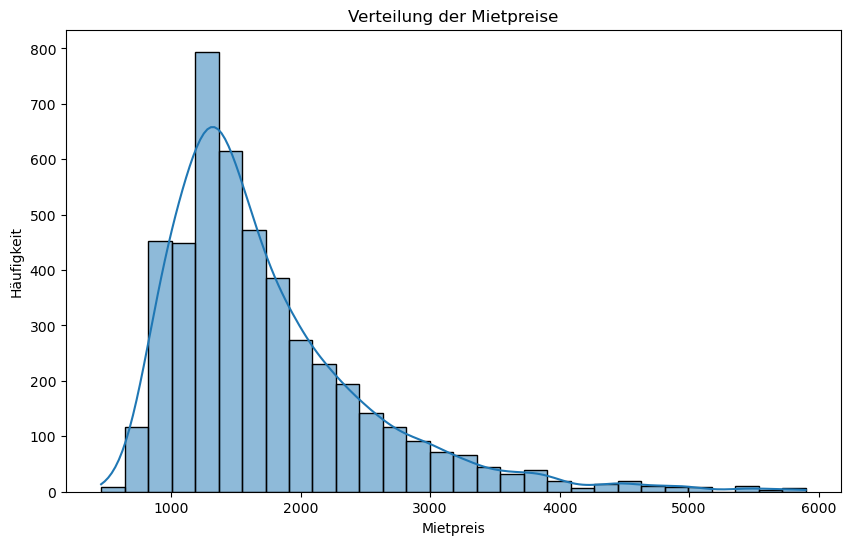

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['rent'], kde=True, bins=30)
plt.title('Verteilung der Mietpreise')
plt.xlabel('Mietpreis')
plt.ylabel('Häufigkeit')

Text(0, 0.5, 'Häufigkeit')

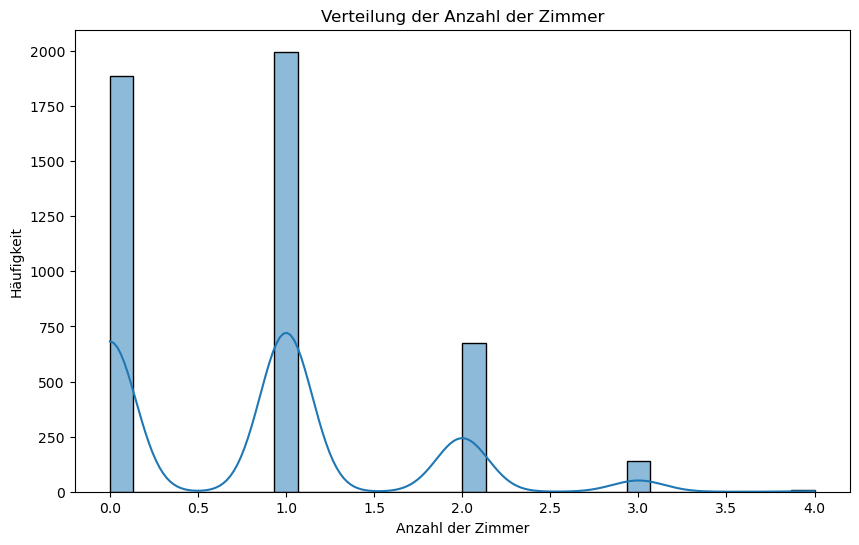

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['rooms'], kde=True, bins=30)
plt.title('Verteilung der Anzahl der Zimmer')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Häufigkeit')

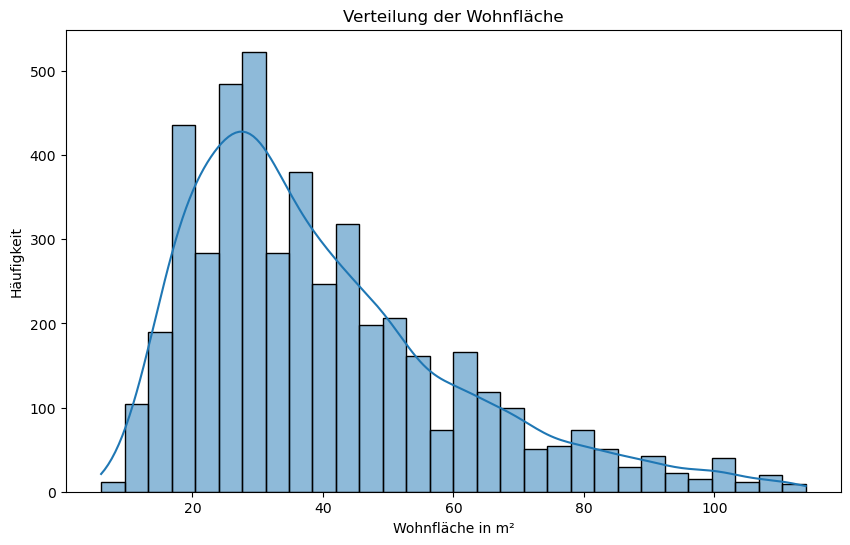

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['area'], kde=True, bins=30)
plt.title('Verteilung der Wohnfläche')
plt.xlabel('Wohnfläche in m²')
plt.ylabel('Häufigkeit')
plt.show()

Text(0, 0.5, 'Häufigkeit')

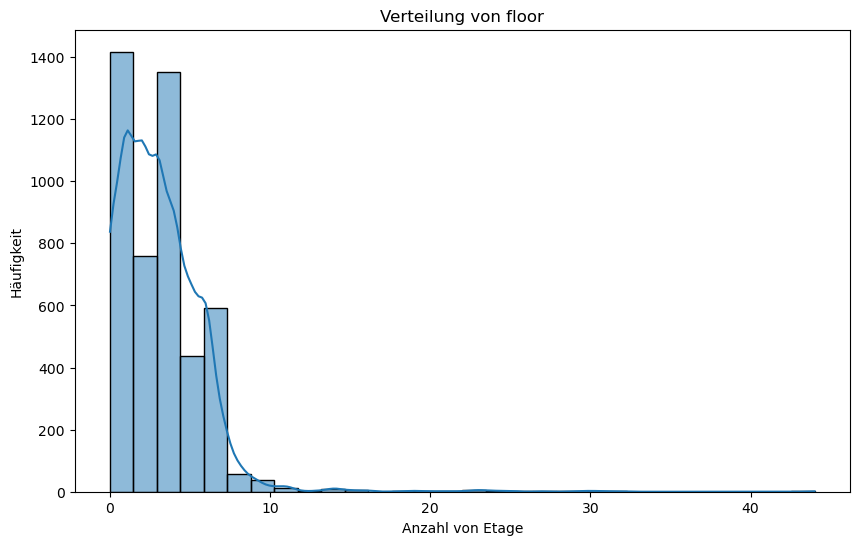

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['floor'], kde=True, bins=30)
plt.title('Verteilung von floor')
plt.xlabel('Anzahl von Etage')
plt.ylabel('Häufigkeit')

C:\Users\cihangir\AppData\Local\Temp\ipykernel_8880\3557910730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")


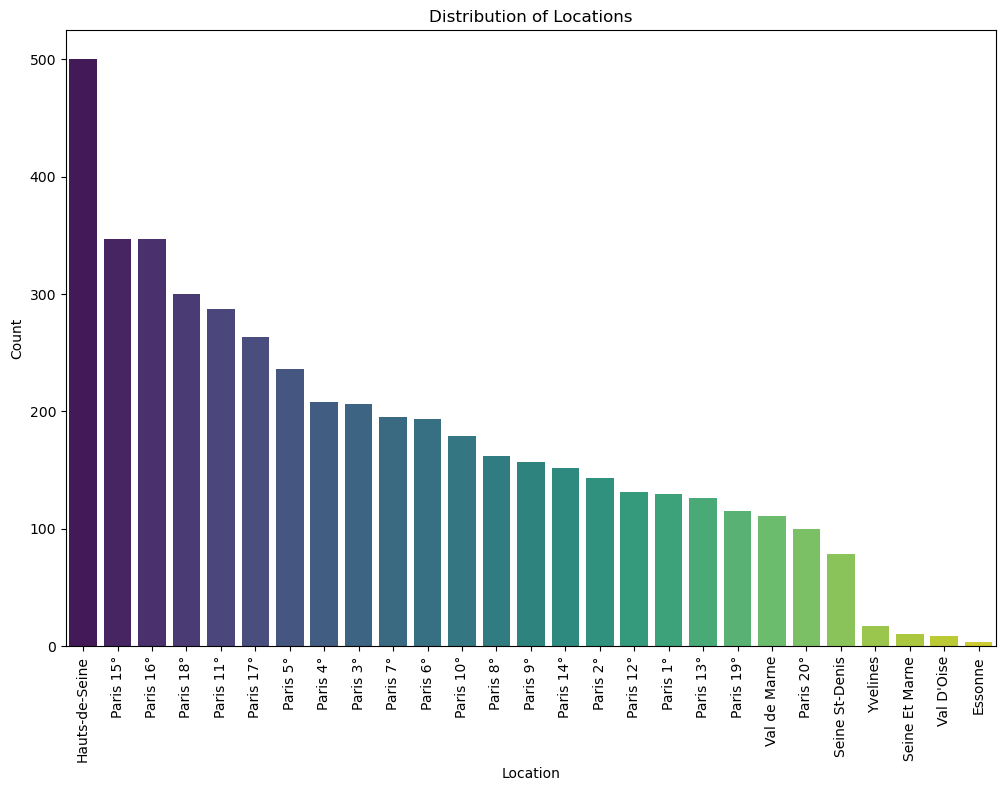

In [29]:
location_counts = dataset['location'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Locations')
plt.show()

C:\Users\cihangir\AppData\Local\Temp\ipykernel_8880\2741157245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='location', y='rent', data=dataset, palette="viridis")


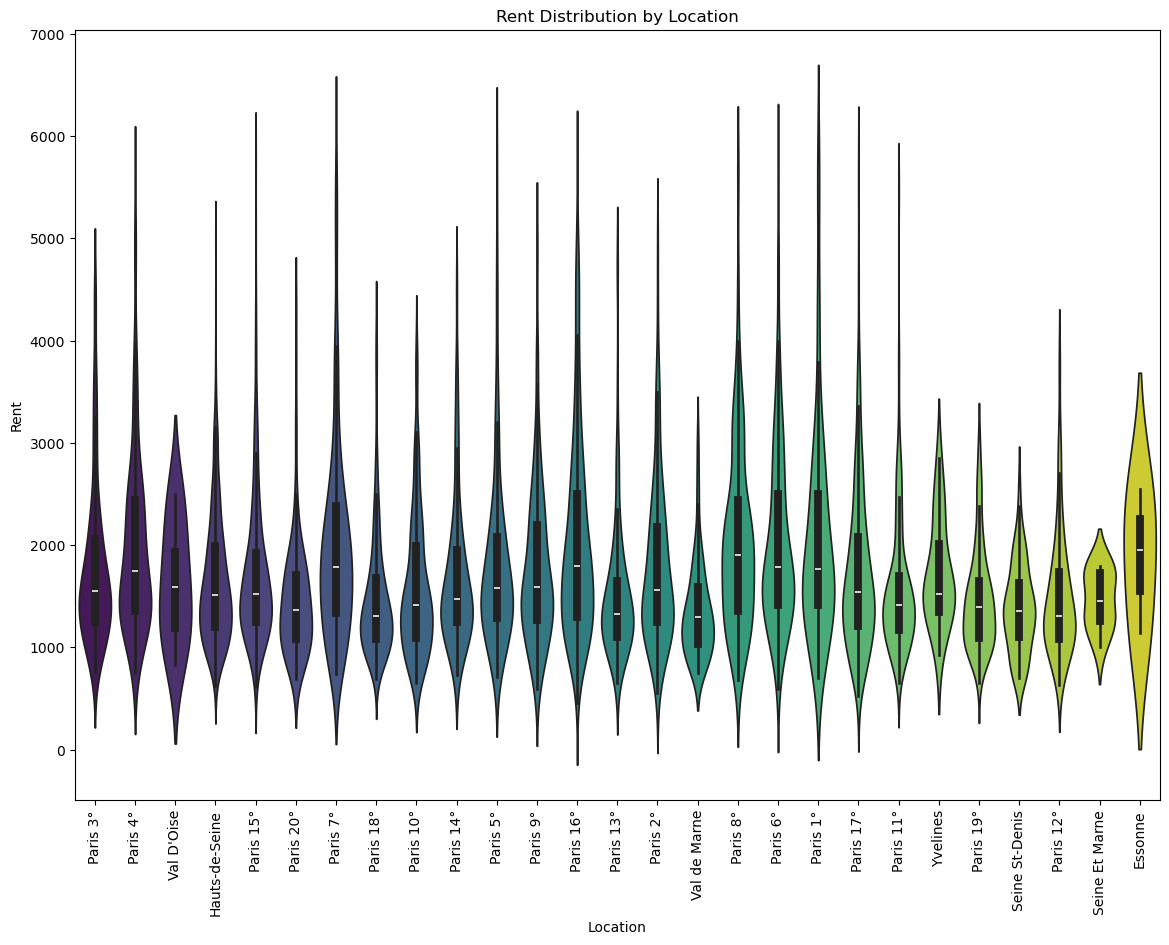

In [32]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='location', y='rent', data=dataset, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Rent')
plt.title('Rent Distribution by Location')
plt.show()

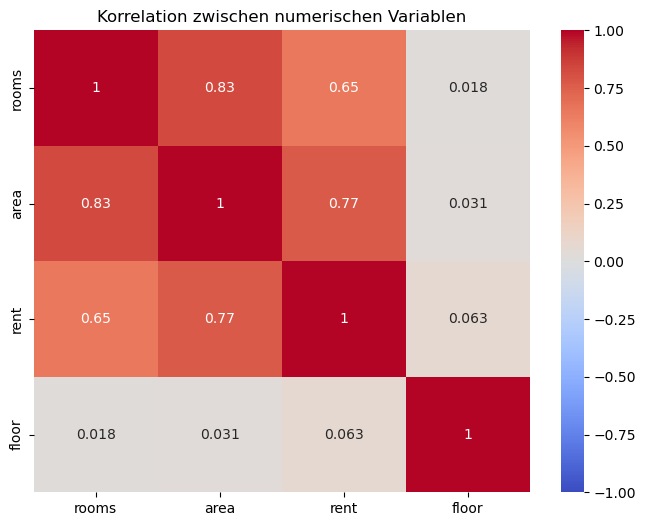

In [33]:
corr_matrix = numerische_daten.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelation zwischen numerischen Variablen')
plt.show()

- rooms und area (0.83):
    - Es gibt eine starke positive Korrelation zwischen der Anzahl der Räume (rooms) und der Fläche (area). Das bedeutet, dass Wohnungen mit mehr Räumen tendenziell auch eine größere Fläche haben. Dies ist eine erwartete und plausible Beziehung.
 
- area und rent (0.77):
    - Es besteht eine starke positive Korrelation zwischen der Fläche (area) und dem Mietpreis (rent). Dies zeigt, dass größere Wohnungen in der Regel auch teurer sind. Diese Korrelation ist in Immobilienmärkten typischerweise sehr ausgeprägt.
- rooms und rent (0.65):
    - Auch zwischen der Anzahl der Räume (rooms) und dem Mietpreis (rent) besteht eine positive Korrelation, wenn auch etwas schwächer als die zwischen area und rent. Wohnungen mit mehr Zimmern sind in der Regel teurer, was ebenfalls Sinn macht, aber es ist weniger stark ausgeprägt als die Korrelation mit der Fläche.
- floor und rent (0.031):
    - Die Korrelation zwischen der Etage (floor) und dem Mietpreis (rent) ist sehr gering. Es scheint keinen signifikanten Zusammenhang zu geben, was darauf hindeutet, dass die Etage keinen großen Einfluss auf den Mietpreis hat.
- floor und rooms/area:
    - Die Korrelation zwischen floor und den anderen Variablen (rooms, area, und rent) ist ebenfalls sehr gering. Die Etage hat keinen klaren Zusammenhang mit der Größe oder der Anzahl der Räume, was in vielen Fällen typisch ist.

- Fazit
    - Fläche (area) und Anzahl der Räume (rooms) sind die stärksten Prädiktoren für den Mietpreis. Diese Variablen haben die höchsten Korrelationen mit dem Mietpreis.
    - Etage (floor) hat eine sehr geringe Korrelation mit dem Mietpreis und ist daher möglicherweise weniger relevant für eine Vorhersage.

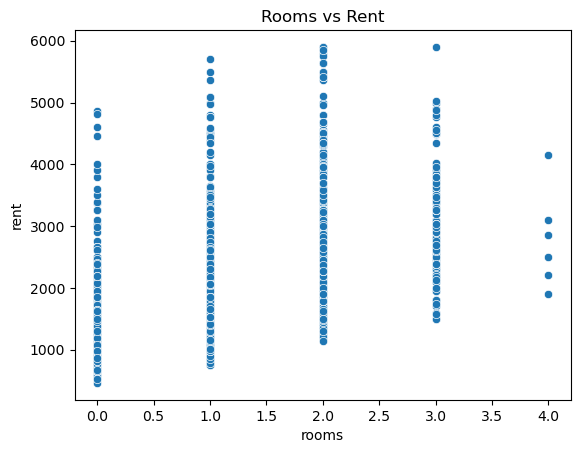

In [34]:
sns.scatterplot(data=numerische_daten, x='rooms', y='rent')
plt.title('Rooms vs Rent')
plt.show()

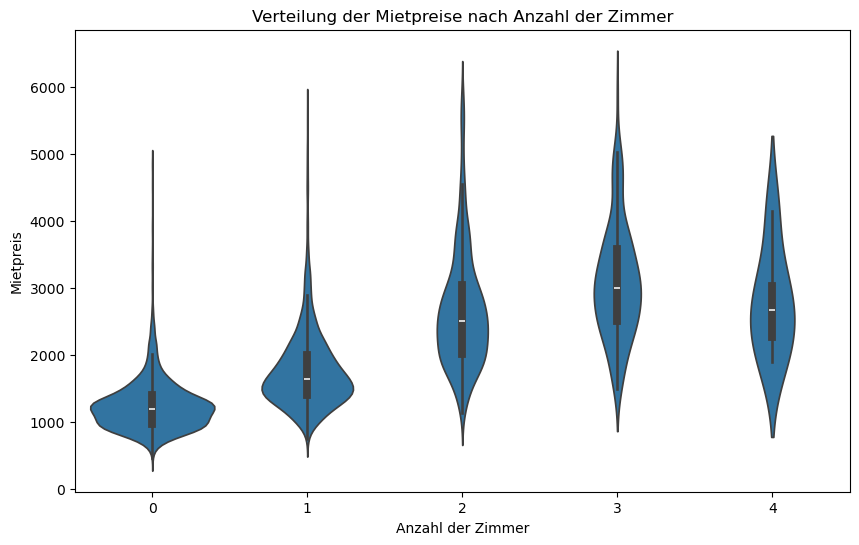

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='rooms', y='rent', data=dataset)
plt.title('Verteilung der Mietpreise nach Anzahl der Zimmer')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Mietpreis')
plt.show()

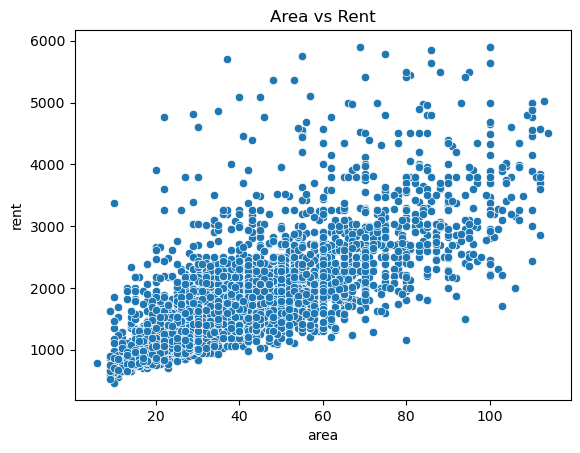

In [36]:
sns.scatterplot(data=numerische_daten, x='area', y='rent')
plt.title('Area vs Rent')
plt.show()

   Welche zusätzlichen Features können aus den Daten extrahiert werden? (Feature-Engineering)

In [37]:
numerische_daten['price_per_m2'] = numerische_daten['rent'] / numerische_daten['area']

C:\Users\cihangir\AppData\Local\Temp\ipykernel_8880\372103709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerische_daten['price_per_m2'] = numerische_daten['rent'] / numerische_daten['area']


In [38]:
numerische_daten

,rooms,area,rent,floor,price_per_m2
0,2,88.0,3600.0,5,40.909091
1,0,17.0,1355.0,6,79.705882
2,3,102.0,2310.0,2,22.647059
3,1,52.0,1450.0,3,27.884615
4,1,30.0,1305.0,1,43.500000
...,...,...,...,...,...
4886,2,67.0,2640.0,7,39.402985
4887,2,70.0,1895.0,6,27.071429
4888,1,27.0,1150.0,2,42.592593
4889,1,43.0,1845.0,4,42.906977


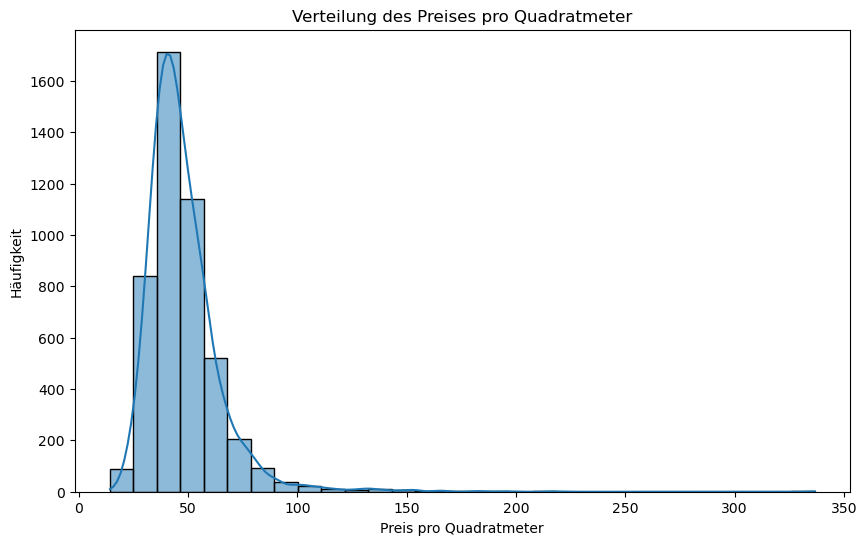

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(numerische_daten['price_per_m2'], kde=True, bins=30)
plt.title('Verteilung des Preises pro Quadratmeter')
plt.xlabel('Preis pro Quadratmeter')
plt.ylabel('Häufigkeit')
plt.show()

 Welche Muster oder Trends lassen sich in den Daten erkennen?


Die Mietpreise zeigen eine hohe Variabilität, was durch die Standardabweichung und die Boxplots sichtbar wird. Es gibt sowohl sehr günstige als auch sehr teure Wohnungen im Datensatz, was möglicherweise auf Unterschiede in der Lage, Ausstattung oder anderen Faktoren zurückzuführen ist.

Es gibt einen deutlichen Unterschied zwischen den niedrigsten und höchsten Mietpreismodellen, was darauf hindeutet, dass der Markt eine breite Spanne an Optionen bietet (vom Budget- bis zum Premium-Segment).

   Welche praktischen Implikationen oder Empfehlungen können auf der Grundlage der Erkenntnisse aus den Daten gegeben werden?


- Empfehlungen für potenzielle Mieter oder Käufer
    - Mieter oder Käufer, die auf der Suche nach einer Wohnung sind, können die Daten verwenden, um eine realistische Vorstellung von den Mietpreismodellen in verschiedenen Stadtteilen zu bekommen. Das hilft ihnen, das Angebot zu vergleichen und zu entscheiden, ob eine Wohnung im Einklang mit der üblichen Preisgestaltung in ihrer gewünschten Gegend steht.
 
- Stadtplanung und politische Empfehlungen
    - Für Stadtplaner oder Politiker, die Wohnungsmarktreformen oder -regulierungen vornehmen möchten, könnten diese Daten zeigen, welche Art von Wohnungen in verschiedenen Stadtgebieten am gefragtesten sind und welche Preispunkte angesprochen werden müssen, um sowohl niedrige als auch mittlere Einkommensgruppen anzusprechen.
 


# Wahrscheinlichkeitsrechnung

Was ist die Wahrscheinlichkeit für das Auftreten der Ereignisse?


In [66]:
total_entries = len(dataset)

rent_above_2000 = dataset['rent'] > 2000
location_paris_15 = dataset['location'] == 'Paris 15°'
rooms_more_than_2 = dataset['rooms'] > 2


rent_above_2000_size = rent_above_2000.sum()
prob_rent_above_2000 = rent_above_2000_size / total_entries

location_paris_15_size = location_paris_15.sum()
prob_location_paris_15 = location_paris_15_size / total_entries


rooms_more_than_2_size = rooms_more_than_2.sum()
prob_rooms_more_than_2 = rooms_more_than_2_size / total_entries

print(f'Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt: {prob_rent_above_2000:.2%}')
print(f'Wahrscheinlichkeit, dass eine Wohnung in Paris 15° liegt: {prob_location_paris_15:.2%}')
print(f'Wahrscheinlichkeit, dass eine Wohnung mehr als 2 Zimmer hat: {prob_rooms_more_than_2:.2%}')

Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt: 25.77%
Wahrscheinlichkeit, dass eine Wohnung in Paris 15° liegt: 7.38%
Wahrscheinlichkeit, dass eine Wohnung mehr als 2 Zimmer hat: 3.13%


Was ist die Wahrscheinlichkeit für das Auftreten des ersten Ereignisses unter der Bedingung des Auftretens des zweiten Ereignisses?

In [70]:
prob_rent_above_2000_and_location_paris_15 = (rent_above_2000 & location_paris_15).sum()/ total_entries

prob_rent_above_2000_given_location_paris_15 = prob_rent_above_2000_and_location_paris_15  / prob_location_paris_15
print(f'Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt, gegeben dass die Wohnung in Paris 15° ist: {prob_rent_above_2000_given_location_paris_15:.2%}')

Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt, gegeben dass die Wohnung in Paris 15° ist: 22.77%


In [71]:
prob_rent_above_2000_and_rooms_more_than2 = (rent_above_2000 & rooms_more_than_2).sum()/ total_entries

prob_rent_above_2000_given_roos_more_than2 = prob_rent_above_2000_and_rooms_more_than2  / prob_rooms_more_than_2
print(f'Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt, gegeben dass die Wohnung mehr als 2 Zimmer hat: {prob_rent_above_2000_given_roos_more_than2:.2%}')

Wahrscheinlichkeit, dass die Miete über 2000 Euro liegt, gegeben dass die Wohnung mehr als 2 Zimmer hat: 90.48%


Was ist die Wahrscheinlichkeit für das Auftreten des zweiten Ereignisses unter der Bedingung des Auftretens des ersten Ereignisses?

In [72]:
prob_location_paris_15_given_rent_above_2000 = prob_rent_above_2000_and_location_paris_15  / prob_rent_above_2000
print(f'Wahrscheinlichkeit, dass die Wohnung in Paris 15° ist, gegeben dass die Miete über 2000 Euro liegt : {prob_location_paris_15_given_rent_above_2000:.2%}')

Wahrscheinlichkeit, dass die Wohnung in Paris 15° ist, gegeben dass die Miete über 2000 Euro liegt : 6.52%


In [73]:
prob_roos_more_than2_given_rent_above_2000 = prob_rent_above_2000_and_rooms_more_than2  / prob_rent_above_2000
print(f'Wahrscheinlichkeit, dass die Wohnung mehr als 2 Zimmer hat , gegeben dass die Miete über 2000 Euro liegt: {prob_roos_more_than2_given_rent_above_2000:.2%}')

Wahrscheinlichkeit, dass die Wohnung mehr als 2 Zimmer hat , gegeben dass die Miete über 2000 Euro liegt: 10.97%
